In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
test = pd.read_csv("spaceship-titanic-data/test.csv")
train = pd.read_csv("spaceship-titanic-data/train.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
test.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [8]:
train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [9]:
train.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [10]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
train.Transported.value_counts()

# very equal, no oversampling needed

Transported
True     4378
False    4315
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

<Axes: xlabel='Age', ylabel='Count'>

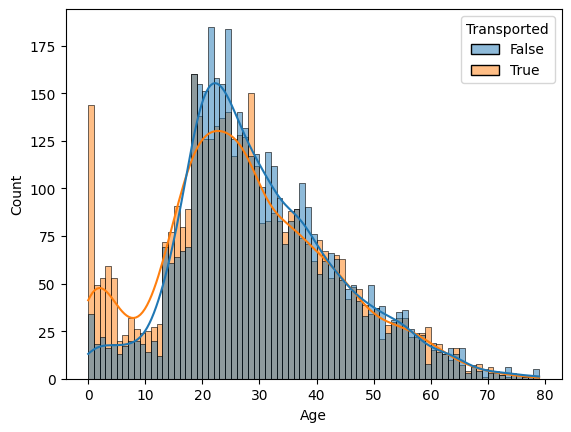

In [12]:
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

## Handling Missing Values

In [13]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [14]:
train.isnull().sum().sum()

2124

In [15]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [16]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [17]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [18]:
train['HomePlanet'] = train['HomePlanet'].fillna(value=train['HomePlanet'].mode()[0])
train['CryoSleep'] = train['CryoSleep'].fillna(value=train['CryoSleep'].mode()[0])
train['Cabin'] = train['Cabin'].fillna(value=train['Cabin'].mode()[0])
train['Destination'] = train['Destination'].fillna(value=train['Destination'].mode()[0])
train['Age'] = train['Age'].fillna(value=train['Age'].mean())
train['VIP'] = train['VIP'].fillna(value=train['VIP'].mode()[0])
train['RoomService'] = train['RoomService'].fillna(value=train['RoomService'].mean())
train['FoodCourt'] = train['FoodCourt'].fillna(value=train['FoodCourt'].mean())
train['ShoppingMall'] = train['ShoppingMall'].fillna(value=train['ShoppingMall'].mean())
train['Spa'] = train['Spa'].fillna(value=train['Spa'].mean())
train['VRDeck'] = train['VRDeck'].fillna(value=train['VRDeck'].mean())

/var/folders/h8/6fttj9fn14ngd88m_dg7zdn40000gn/T/ipykernel_12911/242324865.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(value=train['CryoSleep'].mode()[0])
/var/folders/h8/6fttj9fn14ngd88m_dg7zdn40000gn/T/ipykernel_12911/242324865.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(value=train['VIP'].mode()[0])


In [19]:
test['HomePlanet'] = test['HomePlanet'].fillna(value=train['HomePlanet'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(value=train['CryoSleep'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(value=train['Cabin'].mode()[0])
test['Destination'] = test['Destination'].fillna(value=train['Destination'].mode()[0])
test['Age'] = test['Age'].fillna(value=train['Age'].mean())
test['VIP'] = test['VIP'].fillna(value=train['VIP'].mode()[0])
test['RoomService'] = test['RoomService'].fillna(value=train['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(value=train['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(value=train['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(value=train['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(value=train['VRDeck'].mean())
test.isnull().sum()

/var/folders/h8/6fttj9fn14ngd88m_dg7zdn40000gn/T/ipykernel_12911/3958691787.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(value=train['CryoSleep'].mode()[0])
/var/folders/h8/6fttj9fn14ngd88m_dg7zdn40000gn/T/ipykernel_12911/3958691787.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(value=train['VIP'].mode()[0])


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [20]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Encoding

In [21]:
X = train.drop('Transported', axis = 1)
y = train['Transported']

In [22]:
X = pd.concat([X, pd.get_dummies(X['HomePlanet']).astype(int)], axis = 1)
X = X.drop('HomePlanet', axis = 1)
X = pd.concat([X, pd.get_dummies(X['CryoSleep']).astype(int)], axis = 1)
X = X.drop('CryoSleep', axis = 1)
X = pd.concat([X, pd.get_dummies(X['VIP']).astype(int)], axis = 1)
X = X.drop('VIP', axis = 1)
X = pd.concat([X, pd.get_dummies(X['Destination']).astype(int)], axis = 1)
X = X.drop('Destination', axis = 1)
X

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,1
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,0,0,1
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,1,0,0,1
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,1,0,0,0,1
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0,1,1,0,0
8689,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,1,0
8690,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,1,0,0,0,1
8691,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,1,0,0


In [23]:
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,G/734/S,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,TRAPPIST-1e,28.82793,False,0.0,2680.0,0.0,0.0,523.0


In [24]:
test = pd.concat([test, pd.get_dummies(test['HomePlanet']).astype(int)], axis = 1)
test = test.drop('HomePlanet', axis = 1)
test = pd.concat([test, pd.get_dummies(test['CryoSleep']).astype(int)], axis = 1)
test = test.drop('CryoSleep', axis = 1)
test = pd.concat([test, pd.get_dummies(test['VIP']).astype(int)], axis = 1)
test = test.drop('VIP', axis = 1)
test = pd.concat([test, pd.get_dummies(test['Destination']).astype(int)], axis = 1)
test = test.drop('Destination', axis = 1)
test

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,G/3/S,27.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1
1,F/4/S,19.00000,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,1,0,0,0,1
2,C/0/S,31.00000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,1,0,0
3,C/1/S,38.00000,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,1,0,0,0,1
4,F/5/S,20.00000,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,G/1496/S,34.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1
4273,G/734/S,42.00000,0.0,847.0,17.0,10.0,144.0,1,0,0,1,0,1,0,0,0,1
4274,D/296/P,28.82793,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,1,0,0
4275,D/297/P,28.82793,0.0,2680.0,0.0,0.0,523.0,0,1,0,1,0,1,0,0,0,1


In [25]:
train['Cabin'].value_counts()

Cabin
G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: count, Length: 6560, dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_column = ordinal_encoder.fit_transform(X['Cabin'].values.reshape(-1, 1))
X['Cabin'] = encoded_column
X

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,149.0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0,0,1
1,2184.0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,0,0,1
2,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,1,0,0,1
3,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,1,0,0,0,1
4,2186.0,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,146.0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0,1,1,0,0
8689,5280.0,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,1,0
8690,5285.0,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,1,0,0,0,1
8691,2131.0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,1,0,0


In [27]:
encoded_test = ordinal_encoder.fit_transform(test['Cabin'].values.reshape(-1, 1))
test['Cabin'] = encoded_test
test

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,2784.0,27.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1
1,1867.0,19.00000,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,1,0,0,0,1
2,257.0,31.00000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,1,0,0
3,259.0,38.00000,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,1,0,0,0,1
4,1940.0,20.00000,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2679.0,34.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0,0,1
4273,3088.0,42.00000,0.0,847.0,17.0,10.0,144.0,1,0,0,1,0,1,0,0,0,1
4274,602.0,28.82793,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,1,0,0
4275,603.0,28.82793,0.0,2680.0,0.0,0.0,523.0,0,1,0,1,0,1,0,0,0,1


## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X.columns = X.columns.astype(str)
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,-1.531918,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-1.111173,1.754795,-0.503664,0.732770,-0.732770,0.153063,-0.153063,-0.511013,-0.317487,0.652521
1,-0.516332,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,0.899950,-0.569867,-0.503664,0.732770,-0.732770,0.153063,-0.153063,-0.511013,-0.317487,0.652521
2,-1.605779,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,-1.111173,1.754795,-0.503664,0.732770,-0.732770,-6.533255,6.533255,-0.511013,-0.317487,0.652521
3,-1.605779,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,-1.111173,1.754795,-0.503664,0.732770,-0.732770,0.153063,-0.153063,-0.511013,-0.317487,0.652521
4,-0.515334,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,0.899950,-0.569867,-0.503664,0.732770,-0.732770,0.153063,-0.153063,-0.511013,-0.317487,0.652521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-1.533415,0.848924,-0.340590,3.989682,-0.290817,1.184286,-0.203720,-1.111173,1.754795,-0.503664,0.732770,-0.732770,-6.533255,6.533255,1.956897,-0.317487,-1.532519
8689,1.028757,-0.755179,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0.899950,-0.569867,-0.503664,-1.364685,1.364685,0.153063,-0.153063,-0.511013,3.149739,-1.532519
8690,1.031252,-0.197230,-0.340590,-0.287314,2.842851,-0.275774,-0.269023,0.899950,-0.569867,-0.503664,0.732770,-0.732770,0.153063,-0.153063,-0.511013,-0.317487,0.652521
8691,-0.542782,0.221232,-0.340590,0.370637,-0.290817,0.037223,2.585740,-1.111173,1.754795,-0.503664,0.732770,-0.732770,0.153063,-0.153063,1.956897,-0.317487,-1.532519


In [29]:
test.columns = test.columns.astype(str)
scaled_data = scaler.fit_transform(test)
scaled_test = pd.DataFrame(scaled_data, columns=test.columns)

In [30]:
scaled_test

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,False,True,False,True,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1.169585,-0.118479,-0.364952,-0.291657,-0.319712,-0.274731,-0.251472,0.905539,-0.553131,-0.525314,-1.330443,1.330443,0.132689,-0.132689,-0.494734,-0.315862,0.634992
1,0.257366,-0.688858,-0.364952,-0.285690,-0.319712,2.282833,-0.251472,0.905539,-0.553131,-0.525314,0.751630,-0.751630,0.132689,-0.132689,-0.494734,-0.315862,0.634992
2,-1.344241,0.166710,-0.364952,-0.291657,-0.319712,-0.274731,-0.251472,-1.104315,1.807889,-0.525314,-1.330443,1.330443,0.132689,-0.132689,2.021290,-0.315862,-1.574822
3,-1.342251,0.665792,-0.364952,4.118210,-0.319712,-0.110749,0.222162,-1.104315,1.807889,-0.525314,0.751630,-0.751630,0.132689,-0.132689,-0.494734,-0.315862,0.634992
4,0.329985,-0.617561,-0.348316,-0.291657,0.825893,-0.274731,-0.251472,0.905539,-0.553131,-0.525314,0.751630,-0.751630,0.132689,-0.132689,-0.494734,-0.315862,0.634992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.065132,0.380603,-0.364952,-0.291657,-0.319712,-0.274731,-0.251472,0.905539,-0.553131,-0.525314,-1.330443,1.330443,0.132689,-0.132689,-0.494734,-0.315862,0.634992
4273,1.472000,0.950981,-0.364952,0.269852,-0.289042,-0.265671,-0.134885,0.905539,-0.553131,-0.525314,0.751630,-0.751630,0.132689,-0.132689,-0.494734,-0.315862,0.634992
4274,-1.001040,0.011848,-0.364952,-0.291657,-0.319712,-0.274731,-0.251472,-1.104315,-0.553131,1.903624,-1.330443,1.330443,0.132689,-0.132689,2.021290,-0.315862,-1.574822
4275,-1.000045,0.011848,-0.364952,1.485019,-0.319712,-0.274731,0.171965,-1.104315,1.807889,-0.525314,0.751630,-0.751630,0.132689,-0.132689,-0.494734,-0.315862,0.634992


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y


array([0, 1, 0, ..., 1, 0, 1])

In [32]:
X.shape

(8693, 17)

In [33]:
y.shape

(8693,)

## Model Building

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(scaled_X, y, test_size=0.2, random_state= 1)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(6954, 17)
(6954,)
(1739, 17)
(1739,)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc = dtc.predict(X_val)
print(classification_report(y_val, y_dtc))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       843
           1       0.75      0.75      0.75       896

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_val)
print(classification_report(y_val, y_rfc))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       843
           1       0.82      0.75      0.79       896

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_val)
print(classification_report(y_val, y_logreg))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       843
           1       0.81      0.80      0.80       896

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [39]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_val)
print(classification_report(y_val, y_svc))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       843
           1       0.81      0.77      0.79       896

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [40]:
from sklearn.svm import LinearSVC

linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_linsvc = linsvc.predict(X_val)
print(classification_report(y_val, y_linsvc))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       843
           1       0.82      0.78      0.80       896

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
# from sklearn.neighbors import KNeighborsClassifier

# knc = KNeighborsClassifier()
# knc.fit(X_train, y_train)
# y_knc = knc.predict(X_val)
# print(classification_report(y_val, y_knc))

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_gbc = gbc.predict(X_val)
print(classification_report(y_val, y_gbc))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       843
           1       0.80      0.83      0.82       896

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [43]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier()
# mlp.fit(X_train, y_train)
# y_mlp = mlp.predict(X_val)
# print(classification_report(y_val, y_mlp))

In [44]:
# # Cross-validation

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 4, 5]
# }

# grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# gbc_best = grid_search.best_estimator_
# print(gbc_best)
# y_gbc_best = gbc_best.predict(X_val)
# print(classification_report(y_val, y_gbc_best))

In [45]:
y_pred = gbc.predict(scaled_test)
y_pred_bool = [False if pred == 0 else True for pred in y_pred]
y_pred_bool

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,

In [47]:
test2 = pd.read_csv("spaceship-titanic-data/test.csv")

output = pd.DataFrame({'PassengerId': test2.PassengerId, 'Transported': y_pred_bool})
output.to_csv('submission.csv', index=False)